In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Path to the dataset
dataset_path = '/kaggle/input/fruits-dataset-images/images'  # Update this with the correct dataset path

# Check if dataset exists
for dirname, _, filenames in os.walk(dataset_path):
    for filename in filenames[:5]:  # Display some file paths for verification
        print(os.path.join(dirname, filename))


/kaggle/input/fruits-dataset-images/images/apple fruit/Image_22.jpg
/kaggle/input/fruits-dataset-images/images/apple fruit/Image_34.jpeg
/kaggle/input/fruits-dataset-images/images/apple fruit/Image_13.png
/kaggle/input/fruits-dataset-images/images/apple fruit/Image_4.jpg
/kaggle/input/fruits-dataset-images/images/apple fruit/Image_12.jpg
/kaggle/input/fruits-dataset-images/images/orange fruit/Image_22.jpg
/kaggle/input/fruits-dataset-images/images/orange fruit/Image_34.jpeg
/kaggle/input/fruits-dataset-images/images/orange fruit/Image_4.jpg
/kaggle/input/fruits-dataset-images/images/orange fruit/Image_12.jpg
/kaggle/input/fruits-dataset-images/images/orange fruit/Image_16.jpg
/kaggle/input/fruits-dataset-images/images/strawberry fruit/Image_22.jpg
/kaggle/input/fruits-dataset-images/images/strawberry fruit/Image_34.jpeg
/kaggle/input/fruits-dataset-images/images/strawberry fruit/Image_4.jpg
/kaggle/input/fruits-dataset-images/images/strawberry fruit/Image_12.jpg
/kaggle/input/fruits-da

In [3]:
# Image augmentation and normalization
datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2  # Use 20% of the data for validation
)

# Load training and validation datasets
train_set = datagen.flow_from_directory(
    dataset_path,
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

val_set = datagen.flow_from_directory(
    dataset_path,
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)


Found 288 images belonging to 9 classes.
Found 71 images belonging to 9 classes.


In [4]:
# Define the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(len(train_set.class_indices), activation='softmax')  # Softmax for multi-class classification
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(train_set, validation_data=val_set, epochs=5)


/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


9/9 ━━━━━━━━━━━━━━━━━━━━ 20s 1s/step - accuracy: 0.1106 - loss: 2.3517 - val_accuracy: 0.2676 - val_loss: 2.0981
Epoch 2/5
9/9 ━━━━━━━━━━━━━━━━━━━━ 13s 514ms/step - accuracy: 0.2991 - loss: 2.0328 - val_accuracy: 0.2676 - val_loss: 1.8131
Epoch 3/5
9/9 ━━━━━━━━━━━━━━━━━━━━ 13s 488ms/step - accuracy: 0.3857 - loss: 1.6931 - val_accuracy: 0.4648 - val_loss: 1.4943
Epoch 4/5
9/9 ━━━━━━━━━━━━━━━━━━━━ 13s 477ms/step - accuracy: 0.4412 - loss: 1.4433 - val_accuracy: 0.5211 - val_loss: 1.3749
Epoch 5/5
9/9 ━━━━━━━━━━━━━━━━━━━━ 13s 588ms/step - accuracy: 0.5614 - loss: 1.3511 - val_accuracy: 0.5634 - val_loss: 1.3174


In [5]:
# Evaluate the model
loss, accuracy = model.evaluate(val_set)
print(f"Validation Loss: {loss}")
print(f"Validation Accuracy: {accuracy}")

# Save the model
model.save('fruit_classifier_model.h5')


3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 641ms/step - accuracy: 0.5739 - loss: 1.3024
Validation Loss: 1.3143545389175415
Validation Accuracy: 0.577464759349823


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Prediction: banana fruit


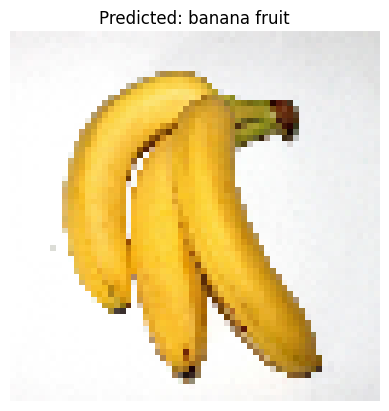

In [7]:
# Load and preprocess a new image
test_image_path = '/kaggle/input/fruits-dataset-images/images/banana fruit/Image_22.jpg'
test_image = load_img(test_image_path, target_size=(64, 64))
test_image_array = img_to_array(test_image)
test_image_array = np.expand_dims(test_image_array, axis=0)
test_image_array = test_image_array / 255.0  # Normalize image

# Predict
predictions = model.predict(test_image_array)
predicted_class_index = np.argmax(predictions)
class_labels = list(train_set.class_indices.keys())
print(f"Prediction: {class_labels[predicted_class_index]}")

# Display the image with prediction
plt.imshow(test_image)
plt.title(f"Predicted: {class_labels[predicted_class_index]}")
plt.axis('off')
plt.show()
